# atomman.defect.slip_vector(system_0, system_1, neighbor_list=None, neighbor_list_cutoff=None)

- - -

**Lucas M. Hale**, [lucas.hale@nist.gov](mailto:lucas.hale@nist.gov?Subject=ipr-demo), *Materials Science and Engineering Division, NIST*.

**Chandler A. Becker**, [chandler.becker@nist.gov](mailto:chandler.becker@nist.gov?Subject=ipr-demo), *Office of Data and Informatics, NIST*.

**Zachary T. Trautt**, [zachary.trautt@nist.gov](mailto:zachary.trautt@nist.gov?Subject=ipr-demo), *Materials Measurement Science Division, NIST*.

Version: 2017-04-21

[Disclaimers](http://www.nist.gov/public_affairs/disclaimer.cfm) 
 
- - -

## Introduction

The slip_vector function calculates the slip vector of all atoms of one system relative to another. The slip vector was originally outlined in [Zimmerman, et. al, Phys Rev Lett 87, 165507 ](http://dx.doi.org/10.1103/PhysRevLett.87.165507). It identifies atoms that are along slip planes in which a dislocation has moved, and the direction and magnitude of the slip vector value relate to the dislocation's Burgers vector.

Here, the slip vector for atom $a$, $S_a$ is calculated as 

$$ S_a = -\sum_{b}{\left( x_{ab} - X_{ab} \right)} $$

where $b$ is the nearest neighbor atoms of atom $a$, $x_{ab}$ is the vector difference between atoms $a$ and $b$ in the current (defect) configuration, and $X_{ab}$ is the vector difference between atoms $a$ and $b$ in the reference (perfect crystal) configuration.

__Note__ that this definition is slightly different from the original in that it is missing a multiplicative factor. The original definition divides the final slip value by the number of neighbor atoms that have slipped. Dividing by the number of slipped atoms scales the slip vector to directly correspond to a dislocation's Burgers vector, however, the number of slipped atoms varies for crystal systems and dislocation types. The factor is not used here in order to make the slip vector function general for all systems.    

Arguments:

- __system_0__ -- a [System](atomman.System.ipynb) with atoms at initial (reference) positions.

- __system_1__ -- a [System](atomman.System.ipynb) with atoms at final positions.

Keyword Arguments:
    
- __neighbor_list__ -- pre-computed neighbor list for system_0.

- __neighbor_list_cutoff__ -- cutoff for computing a neighbor list for system_0.

__Note:__ Calculating the slip vector requires a neighbor list for system_0. Pre-calculated lists computed by [NeighborList](atomman.NeighborList.ipynb) or [nlist](atomman.nlist.ipynb) can be directly passed in using the neighbor_list argument. Supplying neighbor_list_cutoff calculates a neighbor list only for this function. If neither is given, then the function will search for a list stored in the [System.prop](atomman.System.prop.ipynb) dictionary (as done by the [System.neighbors](atomman.System.neighbors.ipynb) and [System.nlist](atomman.System.nlist.ipynb) methods). 

The underlying code can be found in [atomman/defect/slip_vector.py](../../atomman/defect/slip_vector.py).

## Demonstration

In [1]:
#Standard libraries
from __future__ import print_function

#http://matplotlib.org/
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

#http://www.numpy.org/
import numpy as np

#https://github.com/usnistgov/atomman 
import atomman as am
import atomman.unitconvert as uc

Load systems using LAMMPS dump files. The systems are for bcc Nb with a single screw dislocation before and after a shear has been applied.

In [2]:
system_0_file = 'files/atomman.defect.slip_vector/atom.0'
system_1_file = 'files/atomman.defect.slip_vector/atom.7729'

system_0 = am.load('atom_dump', system_0_file)[0]
system_1 = am.load('atom_dump', system_1_file)[0]

print('number of atoms =', system_0.natoms)

number of atoms = 92160


Compute nearest neighbor list for system_0

In [3]:
a = 3.3079

system_0.neighbors(a*0.9)
ave_coord = system_0.prop['neighbors'].coord.mean()

print('average coordination =', ave_coord)

average coordination = 7.99635416667


Calculate slip vector

In [4]:
slip = am.defect.slip_vector(system_0, system_1)

system_1.atoms_prop(key='slip', value=slip)

Plot atom positions colored with slip vector magnitude

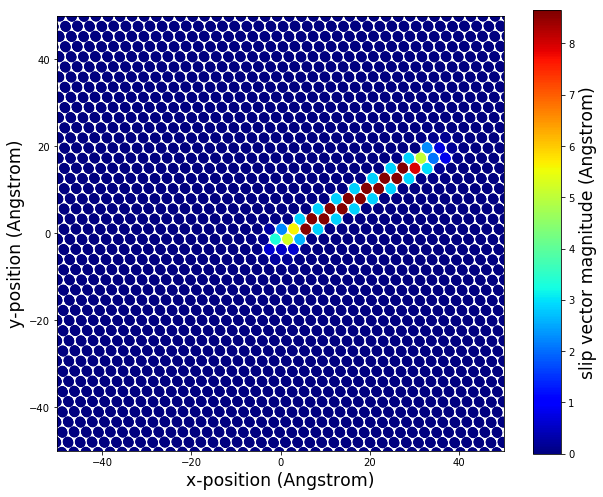

In [5]:
#Extract values
pos =      uc.get_in_units(system_1.atoms_prop(key='pos'), 'angstrom')
slip_mag = uc.get_in_units(np.linalg.norm(slip, axis=1),   'angstrom')

#Generate plot
fig = plt.figure(figsize=(8,8))
im = plt.scatter(pos[:,0], pos[:,1], c=slip_mag, s=80, cmap=cm.jet)

plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel('x-position (Angstrom)', fontsize='xx-large')
plt.ylabel('y-position (Angstrom)', fontsize='xx-large')
cbar_ax = fig.add_axes([.95, .12, 0.05, .77])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(label='slip vector magnitude (Angstrom)', fontsize='xx-large')
plt.show()

The value of slip vectors along the plane in which the dislocation has moved should be related to a Burgers vector. Here, we know that there is only one dislocation moving, so all large slip vectors should be associated with it.

In [6]:
ave_slip = uc.get_in_units(np.mean(slip_mag[slip_mag > 8]), 'angstrom')
print(ave_slip)

8.60347188652


A bcc screw dislocation has Burgers vector a/2<111>. The average slip should be a multiple of this (as value is not scaled by the number of slipped neighbors).

In [7]:
burgers_mag = a/2 * 3**0.5

print(ave_slip/burgers_mag)

3.00324484395


- - -
__Docs Navigation:__

Tutorial:

1. [Basics](../tutorial/1 Basics.ipynb)

2. [LAMMPS Functionality](../tutorial/2 LAMMPS Functionality.ipynb)

3. [Defect Generation and Evaluation](../tutorial/3 Defect Generation and Evaluation.ipynb)


Reference:

- [atomman](../reference/atomman.ipynb)

- [atomman.convert](../reference/atomman.convert.ipynb)

- [atomman.defect](../reference/atomman.defect.ipynb)

- [atomman.lammps](../reference/atomman.lammps.ipynb)

- [atomman.tools](../reference/atomman.tools.ipynb)

- [atomman.unitconvert](../reference/atomman.unitconvert.ipynb)